In [ ]:
from jax import grad, jit
import jax.numpy as jnp   # jax's numpy version with GPU support
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

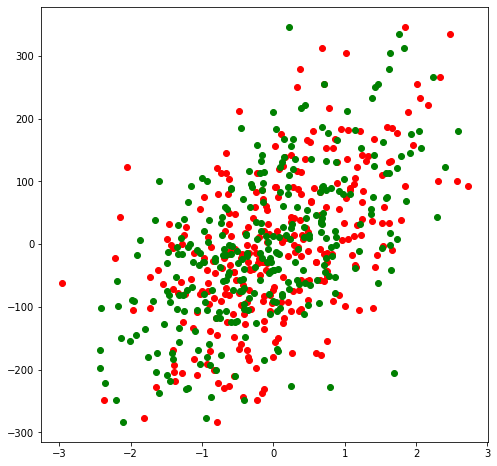

In [ ]:
X,y= make_regression(n_samples = 300, n_features=  3, noise = 5)
y=y.reshape((y.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15) #Splitting data into train and test
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], y, c='r')
plt.scatter(X[:,1], y, c='g')
plt.show()

In [ ]:
def loss(w,b,X,y):          #Mean Squared Error (MSE) function to calculate loss
  pred = X.dot(w)+ b
  return ((pred-y)**2).mean()

In [ ]:
Weights = jnp.zeros((X_train.shape[1],1)) # jnp array with zero initialization
bias = 0.
l_rate = 0.001
n_iter = 3000

In [ ]:
#gradient functions for weights and bias
gradW = jit(grad(loss, argnums=0)) #wrapped with jit function for faster processing
gradb = jit(grad(loss,argnums=1))
#  “argnums” parameter allows us to numerate the arguments

In [ ]:
for _ in range(n_iter):
  dW = gradW(Weights,bias,X_train,y_train)
  db = gradb(Weights,bias,X_train,y_train)
  print(loss(Weights,bias,X_train,y_train))
  Weights -= dW*l_rate
  bias-= db*l_rate

25.26233
25.262093
25.261856
25.261623
25.261387
25.261154
25.260923
25.26069
25.260458
25.260227
25.259996
25.25977
25.25954
25.259312
25.259085
25.25886
25.25863
25.258408
25.258183
25.257957
25.257734
25.257511
25.25729
25.257067
25.256845
25.256626
25.256405
25.256186
25.255968
25.255753
25.255533
25.255318
25.255102
25.254887
25.254671
25.254457
25.254244
25.25403
25.25382
25.253609
25.253399
25.253185
25.252977
25.252766
25.252558
25.252348
25.252142
25.251936
25.251728
25.251522
25.251316
25.251116
25.25091
25.250706
25.250504
25.250301
25.250101
25.249899
25.249699
25.249498
25.249296
25.2491
25.248903
25.248703
25.248508
25.24831
25.248114
25.24792
25.247725
25.24753
25.247335
25.247143
25.24695
25.246758
25.246567
25.246374
25.246185
25.245996
25.245806
25.245617
25.245426
25.245241
25.245054
25.244865
25.24468
25.244495
25.24431
25.244125
25.24394
25.243757
25.243576
25.243391
25.24321
25.243029
25.242847
25.242668
25.242487
25.242308
25.242128
25.241951
25.241774
25.241596


In [ ]:
loss(Weights, bias, X_test, y_test) #Model's Loss on test set

DeviceArray(22.813456, dtype=float32)

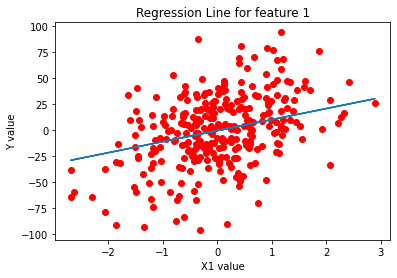

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 1")
ax.set_xlabel("X1 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,0], y, c='r')
plt.plot(X[:,0], X[:,0]*Weights[0]+bias)
plt.show()

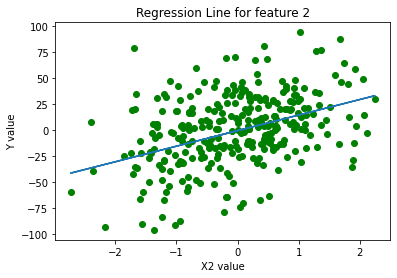

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 2")
ax.set_xlabel("X2 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,1], y, c='g')
plt.plot(X[:,1], X[:,1]*Weights[1]+bias)
plt.show()